# FREQUENCY DOMAIN FILTERING

## Importing Libraries

In [278]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import math
import cmath

## Creating Sinusoidal Images

In [219]:
M=500
N=500
img_a = np.zeros((M,N))
img_b = np.zeros((M,N))

In [220]:
for i in range(0,M):
    for j in range(0,N):
        img_a[i][j]=math.sin(2*math.pi*40*i/M + 2*math.pi*60*j/N)
        img_b[i][j]=math.sin(2*math.pi*20*i/M + 2*math.pi*100*j/N)

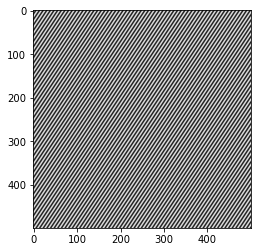

In [221]:
plt.imshow(img_a,cmap='gray')

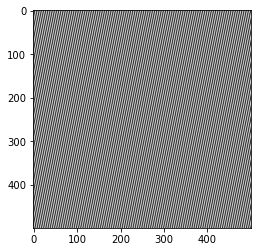

In [222]:
plt.imshow(img_b,cmap='gray')

## Finding FFT

In [286]:
ft_a = np.fft.fft2(img_a)
ft_b = np.fft.fft2(img_b)

In [287]:
tmp_ft_a = abs(ft_a)/abs(ft_a).max()*255
tmp_ft_b = abs(ft_b)/abs(ft_b).max()*255

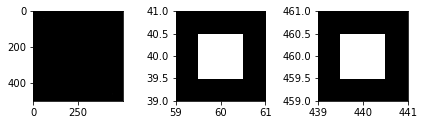

In [288]:
# Plotting frequency domain plot of images
plt.subplot(1,3,1)

plt.imshow(abs(tmp_ft_a),cmap='gray')

plt.subplot(1,3,2)
plt.imshow(abs(tmp_ft_a),cmap='gray')
plt.xlim([59,61])
plt.ylim([39,41])

plt.subplot(1,3,3)
plt.imshow(abs(tmp_ft_a),cmap='gray')
plt.xlim([439,441])
plt.ylim([459,461])
plt.tight_layout()

FFT images of a and their magnified version

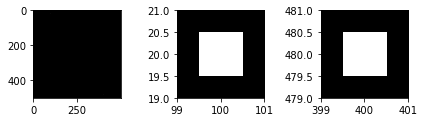

In [289]:
# Plotting frequency domain plot of images
plt.subplot(1,3,1)

plt.imshow(abs(tmp_ft_b),cmap='gray')

plt.subplot(1,3,2)
plt.imshow(abs(tmp_ft_b),cmap='gray')
plt.xlim([99,101])
plt.ylim([19,21])

plt.subplot(1,3,3)
plt.imshow(abs(tmp_ft_b),cmap='gray')
plt.xlim([399,401])
plt.ylim([479,481])
plt.tight_layout()

FFT images of b and their magnified version

In [290]:
ft_b.shape

(500, 500)

## Comparing IFFT of sum in frequency domain and orig image sum

In [291]:
ft = ft_a+ft_b

In [293]:
# Finding IFFT of FFT sum
img = np.fft.ifft2(ft)
img = np.real(img) # To remove complex compponent as they are negligible as this is a real signal
img.shape

(500, 500)

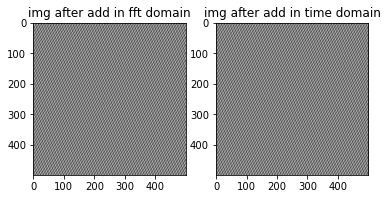

In [294]:
plt.subplot(1,2,1)
plt.title('img after add in fft domain')
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.title('img after add in time domain')
plt.imshow(img_a+img_b,cmap='gray')
plt.show()

In [297]:
# Finding error between IFFt image and real domain summed image
error = 0
for i in range(0,M):
    for j in range(0,N):
        error = error + (img_a[i][j]+img_b[i][j]-img[i][j])**2
error        

2.7123020224275284e-26

## Various Frequency Domain Filters

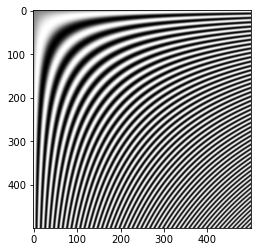

In [357]:
img = skimage.io.imread('./images/dynamicSine.png')
plt.imshow(img,cmap='gray')

In [358]:
ft = np.fft.fft2(img)

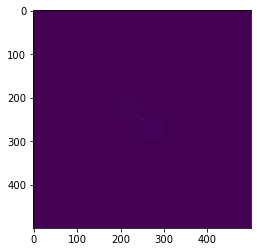

In [359]:
ft =np.fft.fftshift(ft)
plt.imshow(abs(ft))

In [360]:
ft.shape

(500, 500)

In [361]:
#Ideal low pass filter
D=20
P=img.shape[0]
Q=img.shape[1]
IHPF_20=np.ones((P,Q))
ILPF_20 = np.zeros((img.shape[0],img.shape[1]))
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if(math.sqrt((i-P/2)**2 + (j-Q/2)**2)<=D):
            ILPF_20[i][j]=1
IHPF_20 = IHPF_20 - ILPF_20

In [362]:
#Ideal High pass filter
D=60
P=img.shape[0]
Q=img.shape[1]
IHPF_60=np.ones((P,Q))
ILPF_60 = np.zeros((img.shape[0],img.shape[1]))
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if(math.sqrt((i-P/2)**2 + (j-Q/2)**2)<=D):
            ILPF_60[i][j]=1
IHPF_60 = IHPF_60 - ILPF_60

In [363]:
# Ideal Band pass filter
IBPF_20_60=IHPF_20 * ILPF_60

In [364]:
IBPF_20_60

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [365]:
LP_output = ft*ILPF_20
HP_output = ft*IHPF_60
BP_output = ft*IBPF_20_60

In [368]:
ift = np.fft.ifftshift(LP_output)
LP_img = np.fft.ifft2(ift)
LP_img=np.real(LP_img)

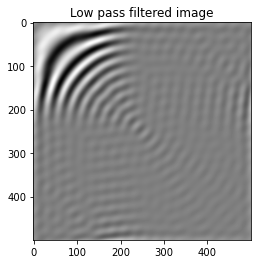

In [372]:
plt.imshow(LP_img,cmap='gray')
plt.title("Low pass filtered image")
plt.show()

In [373]:
ift = np.fft.ifftshift(HP_output)
HP_img = np.fft.ifft2(ift)
HP_img=np.real(HP_img)

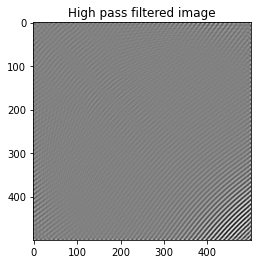

In [374]:
plt.imshow(HP_img,cmap='gray')
plt.title("High pass filtered image")
plt.show()

In [375]:
ift = np.fft.ifftshift(BP_output)
BP_img = np.fft.ifft2(ift)
BP_img=np.real(BP_img)

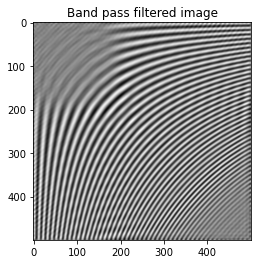

In [377]:
plt.imshow(BP_img,cmap='gray')
plt.title("Band pass filtered image")
plt.show()

## Low Pass filtering an image

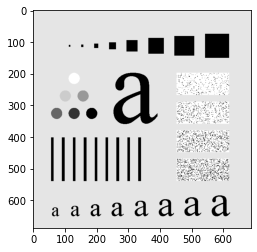

In [406]:
img = skimage.io.imread('./images/characters.tif')
plt.imshow(img,cmap='gray')

In [407]:
img.shape

(688, 688)

In [408]:
#Ideal low pass filter
D=20
P=img.shape[0]
Q=img.shape[1]
ILPF = np.zeros((img.shape[0],img.shape[1]))
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if(math.sqrt((i-P/2)**2 + (j-Q/2)**2)<=D):
            ILPF[i][j]=1

In [409]:
ft = np.fft.fft2(img)
ft = np.fft.fftshift(ft)
filtered_out = ft*ILPF
ift = np.fft.ifftshift(filtered_out)
filt_img = np.fft.ifft2(ift)
filt_img = np.real(filt_img)

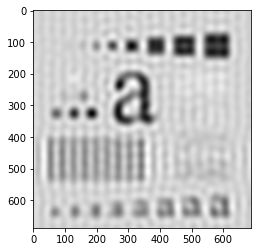

In [410]:
plt.imshow(filt_img,cmap='gray')

In [411]:
#Gaussian Low pass filter
D=100
P=img.shape[0]
Q=img.shape[1]
GLPF = np.zeros((img.shape[0],img.shape[1]))
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if(math.sqrt((i-P/2)**2 + (j-Q/2)**2)<=D):
            GLPF[i][j]= math.exp(-(img[i][j])**2 /(2*D**2))

In [412]:
ft = np.fft.fft2(img)
ft = np.fft.fftshift(ft)
filtered_out = ft*GLPF
ift = np.fft.ifftshift(filtered_out)
filt_img = np.fft.ifft2(ift)
filt_img = np.real(filt_img)

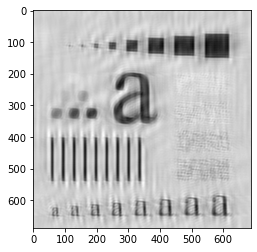

In [413]:
plt.imshow(filt_img,cmap='gray')